In [1]:
!pip install stanza indic-nlp-library

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 8.1 MB/s eta 0:00:00


In [2]:
import stanza
import pandas as pd
from indicnlp.tokenize import indic_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Download Telugu model for Stanza (if not already downloaded)
stanza.download('te', processors='tokenize,pos')

# Initialize the Telugu NLP pipeline
nlp = stanza.Pipeline('te', processors='tokenize,pos', use_gpu=False)

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading these customized packages for language: te (Telugu)...
| Processor       | Package      |
----------------------------------
| tokenize        | mtg          |
| pos             | mtg_charlm   |
| pretrain        | fasttextwiki |
| forward_charlm  | oscar2022    |
| backward_charlm | oscar2022    |



INFO:stanza:Downloaded file to /root/stanza_resources/te/tokenize/mtg.pt


INFO:stanza:Downloaded file to /root/stanza_resources/te/pos/mtg_charlm.pt


INFO:stanza:Downloaded file to /root/stanza_resources/te/pretrain/fasttextwiki.pt


INFO:stanza:Downloaded file to /root/stanza_resources/te/forward_charlm/oscar2022.pt


INFO:stanza:Downloaded file to /root/stanza_resources/te/backward_charlm/oscar2022.pt
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: te (Telugu):
| Processor | Package    |
--------------------------
| tokenize  | mtg        |
| pos       | mtg_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
/usr/local/lib/python3.10/dist-packages/stanza/models/tokenization/trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user

In [5]:
# Load the dataset
file_path = '/content/dataset(nlp).csv'
df = pd.read_csv(file_path)

# Fill missing data if any
df['Verse'] = df['Verse'].fillna('')

# Get the number of rows
print(df.shape[0])

df.head()

1000


,Verseid,Verse
0,1,ఆదియందు దేవుడు భూమ్యాకాశములను సృజించెను.
1,2,భూమి నిరాకారముగాను శూన్యముగాను ఉండెను; చీకటి అ...
2,3,దేవుడు వెలుగు కమ్మని పలుకగా వెలుగు కలిగెను.
3,4,వెలుగు మంచిదైనట్టు దేవుడుచూచెను; దేవుడు వెలుగు...
4,5,"దేవుడు వెలుగునకు పగలనియు, చీకటికి రాత్రి అనియు..."


In [6]:
# Tokenization and POS tagging using Stanza
def stanza_pos_tagging(verse):
    doc = nlp(verse)
    tokens_and_tags = [(word.text, word.pos) for sentence in doc.sentences for word in sentence.words]
    return tokens_and_tags

In [7]:
# Apply POS tagging to each verse
df['POS_Tags'] = df['Verse'].apply(stanza_pos_tagging)


In [8]:
# Convert the DataFrame into a format with one word per row and corresponding POS tag
formatted_data = []
for _, row in df.iterrows():
    for word, pos in row['POS_Tags']:
        formatted_data.append({'Word': word, 'POS_Tag': pos})

In [9]:
# Create a new DataFrame for the formatted data
formatted_df = pd.DataFrame(formatted_data)

In [10]:
# 1. Total Verses
total_verses = df.shape[0]  # Total number of rows (verses) in the dataset

# 2. Total Words
total_words = formatted_df['Word'].nunique()  # Unique words in the dataset

# 3. POS Tags
distinct_pos_tags = formatted_df['POS_Tag'].nunique()  # Number of unique POS tags

print("Feature Description - Count")
print(f"Total Verses: {total_verses}")
print(f"Total Words: {total_words}")
print(f"POS Tags: {distinct_pos_tags}")

Feature Description - Count
Total Verses: 1000
Total Words: 5601
POS Tags: 14


<ipython-input-11-e3c29c2797bd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pos_counts.index, y=pos_counts.values, palette='Blues_d')


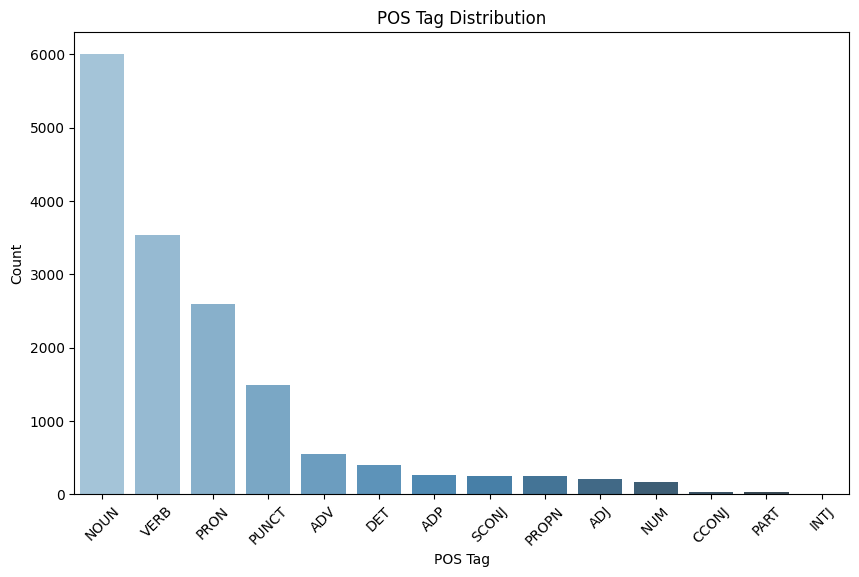

In [11]:
plt.figure(figsize=(10, 6))
pos_counts = formatted_df['POS_Tag'].value_counts()
sns.barplot(x=pos_counts.index, y=pos_counts.values, palette='Blues_d')
plt.title('POS Tag Distribution')
plt.ylabel('Count')
plt.xlabel('POS Tag')
plt.xticks(rotation=45)
plt.show()

In [18]:
from difflib import get_close_matches

# Load the dataset (assuming formatted_df is already loaded and contains a 'Word' column)
valid_words = formatted_df['Word'].unique().tolist()  # Extract unique words from the dataset

def spell_check(word):
    """
    Spell check a word using a list of valid words.
    Suggests a correction if the word is incorrect.
    """
    # Normalize input (if required)
    word = word.strip()

    if word in valid_words:  # Direct match
        return "Correct"
    else:  # If not correct, suggest a correction
        corrected = get_close_matches(word, valid_words, n=1)  # Closest match
        if corrected:
            return corrected[0]  # Return only the suggested correction
        else:
            return None  # No suggestion available

# Test the function
word = "ముసలితనమంద"  # Example word for testing
result = spell_check(word)

if result:
    print(f"Suggested correction for '{word}': {result}.")
else:
    print(f"No suggestions available for '{word}'.")

Suggested correction for 'ముసలితనమంద': ముసలితనమందు.


In [17]:
print(valid_words)

['ఆదియందు', 'దేవుడు', 'భూమ్యాకాశములను', 'సృజించెను', '.', 'భూమి', 'నిరాకారముగాను', 'శూన్యముగాను', 'ఉండెను;', 'చీకటి', 'అగాధ', 'జలము', 'పైన', 'కమ్మియుండెను;', 'దేవుని', 'ఆత్మ', 'జలములపైన', 'అల్లాడుచుండెను', 'వెలుగు', 'కమ్మని', 'పలుకగా', 'కలిగెను', 'మంచిదైనట్టు', 'దేవుడుచూచెను;', 'వెలుగును', 'చీకటిని', 'వేరుపరచెను', 'వెలుగునకు', 'పగలనియు', ',', 'చీకటికి', 'రాత్రి', 'అనియు', 'పేరు', 'పెట్టెను', 'అస్తమయమును', 'ఉదయమును', 'కలుగగా', 'ఒక', 'దినమాయెను', 'మరియు', 'దేవుడుజలముల', 'మధ్య', 'నొక', 'విశాలము', 'కలిగి', 'ఆ', 'జలములను', 'ఈ', 'వేరుపరచును', 'గాకని', 'పలికెను', 'చేసి', 'క్రింది', 'మీది', 'వేరుపరపగా', 'ప్రకారమాయెను', 'విశాలమునకు', 'ఆకాశమని', 'రెండవ', 'దేవుడుఆకాశము', 'క్రిందనున్న', 'లొకచోటనే', 'కూర్చబడి', 'ఆరిన', 'నేల', 'కనబడును', 'నేలకు', 'అని', 'జలరాశికి', 'ఆయన', 'సముద్రములని', 'అది', 'మంచిదని', 'చూచెను', 'దేవుడుగడ్డిని', 'విత్తనములిచ్చు', 'చెట్లను', 'భూమిమీద', 'తమ', 'జాతి', 'ప్రకారము', 'తమలో', 'విత్తనములుగల', 'ఫలమిచ్చు', 'ఫలవృక్షములను', 'మొలిపించుగాకని', 'ప్రకార', 'మాయెను', 'గడ్డిని', 'మొల

In [19]:
# Example usage
word = 'మాటచొప్పున'
result = spell_check(word)
print(f"The word '{word}' is {result}.")

The word 'మాటచొప్పున' is Correct.


In [20]:
# # Apply spell checking
formatted_df['Spell_Check'] = formatted_df['Word'].apply(spell_check)

In [21]:
# Save the formatted data to a CSV file
output_file_path = 'path_to_save_output.csv'
formatted_df.to_csv(output_file_path, index=False)

In [22]:
print(f"Formatted dataset saved to {output_file_path}")

Formatted dataset saved to path_to_save_output.csv


In [23]:
# Print out the first few rows of the DataFrame to verify

formatted_df.columns
formatted_df.head(20)

,Word,POS_Tag,Spell_Check
0,ఆదియందు,NOUN,Correct
1,దేవుడు,NOUN,Correct
2,భూమ్యాకాశములను,NOUN,Correct
3,సృజించెను,VERB,Correct
4,.,PUNCT,Correct
5,భూమి,NOUN,Correct
6,నిరాకారముగాను,NOUN,Correct
7,శూన్యముగాను,NOUN,Correct
8,ఉండెను;,VERB,Correct
9,చీకటి,NOUN,Correct


In [24]:
import pandas as pd
import difflib

# Load the dataset from the CSV file
file_path = 'path_to_save_output.csv'  # Update this with the actual file path in your colab
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,Word,POS_Tag,Spell_Check
0,ఆదియందు,NOUN,Correct
1,దేవుడు,NOUN,Correct
2,భూమ్యాకాశములను,NOUN,Correct
3,సృజించెను,VERB,Correct
4,.,PUNCT,Correct


In [25]:
# Group by sentences (use punctuation to split sentences)
def group_sentences(df):
    sentences = []
    current_sentence = []
    for idx, row in df.iterrows():
        current_sentence.append((row['Word'], row['POS_Tag'], row['Spell_Check']))
        if row['Word'] in ['.', '!', '?']:  # End of sentence
            sentences.append(current_sentence)
            current_sentence = []
    if current_sentence:  # Append any remaining sentence
        sentences.append(current_sentence)
    return sentences

In [26]:
# Get sentence-wise data
sentences = group_sentences(df)

# Display the structure of one sentence for reference
for sentence in sentences[:1]:  # Show first sentence
    print(sentence)

[('ఆదియందు', 'NOUN', 'Correct'), ('దేవుడు', 'NOUN', 'Correct'), ('భూమ్యాకాశములను', 'NOUN', 'Correct'), ('సృజించెను', 'VERB', 'Correct'), ('.', 'PUNCT', 'Correct')]


In [27]:
# Function to correct misspelled words in each sentence
def spellcheck_sentence(sentence, correct_words):
    corrected_sentence = []
    for word, pos, spell in sentence:
        # Apply correction only if the word is incorrect
        if spell == 'Incorrect':
            corrected_word = difflib.get_close_matches(word, correct_words, n=1)
            corrected_word = corrected_word[0] if corrected_word else word
        else:
            corrected_word = word
        corrected_sentence.append((corrected_word, pos))
    return corrected_sentence


In [28]:
# List of correct words from the dataset
correct_words = df[df['Spell_Check'] == 'Correct']['Word'].unique().tolist()

# Apply spellcheck to each sentence
corrected_sentences = [spellcheck_sentence(sentence, correct_words) for sentence in sentences]

In [29]:
# Placeholder for a function to tag POS for corrected sentences
# Assuming you have a trained POS model or using a simple tagger (replace with actual model if needed)
def pos_tag_sentence(corrected_sentence):
    # Dummy POS tagging logic (replace with actual model predictions)
    return [(word, pos) for word, pos in corrected_sentence]

# Apply POS tagging to each corrected sentence
pos_tagged_sentences = [pos_tag_sentence(sentence) for sentence in corrected_sentences]

In [30]:
# Function to print sentence-wise results
def display_results(original_sentences, corrected_sentences, pos_tagged_sentences):
    for i, sentence in enumerate(original_sentences[:5]):  # Display first 5 sentences
        original_sentence = " ".join([w[0] for w in sentence if w[0] not in ['.', '!', '?']]) + sentence[-1][0]
        corrected_sentence = " ".join([w[0] for w in corrected_sentences[i] if w[0] not in ['.', '!', '?']]) + corrected_sentences[i][-1][0]
        pos_tagged_output = [(w[0], w[1]) for w in pos_tagged_sentences[i] if w[0] not in ['.', '!', '?']]

        print(f"Original Verse {i+1}: {original_sentence}")
        print(f"Spellchecked Output {i+1}: {corrected_sentence}")
        print(f"POS Tagged Output {i+1}: {pos_tagged_output}\n")

# Display results for the first 5 sentences
display_results(sentences, corrected_sentences, pos_tagged_sentences)

Original Verse 1: ఆదియందు దేవుడు భూమ్యాకాశములను సృజించెను.
Spellchecked Output 1: ఆదియందు దేవుడు భూమ్యాకాశములను సృజించెను.
POS Tagged Output 1: [('ఆదియందు', 'NOUN'), ('దేవుడు', 'NOUN'), ('భూమ్యాకాశములను', 'NOUN'), ('సృజించెను', 'VERB')]

Original Verse 2: భూమి నిరాకారముగాను శూన్యముగాను ఉండెను; చీకటి అగాధ జలము పైన కమ్మియుండెను; దేవుని ఆత్మ జలములపైన అల్లాడుచుండెను.
Spellchecked Output 2: భూమి నిరాకారముగాను శూన్యముగాను ఉండెను; చీకటి అగాధ జలము పైన కమ్మియుండెను; దేవుని ఆత్మ జలములపైన అల్లాడుచుండెను.
POS Tagged Output 2: [('భూమి', 'NOUN'), ('నిరాకారముగాను', 'NOUN'), ('శూన్యముగాను', 'NOUN'), ('ఉండెను;', 'VERB'), ('చీకటి', 'NOUN'), ('అగాధ', 'ADJ'), ('జలము', 'NOUN'), ('పైన', 'ADP'), ('కమ్మియుండెను;', 'VERB'), ('దేవుని', 'NOUN'), ('ఆత్మ', 'NOUN'), ('జలములపైన', 'NOUN'), ('అల్లాడుచుండెను', 'VERB')]

Original Verse 3: దేవుడు వెలుగు కమ్మని పలుకగా వెలుగు కలిగెను.
Spellchecked Output 3: దేవుడు వెలుగు కమ్మని పలుకగా వెలుగు కలిగెను.
POS Tagged Output 3: [('దేవుడు', 'NOUN'), ('వెలుగు', 'NOUN'), ('కమ్మని', 

In [31]:
# Install required libraries
!pip install sklearn_crfsuite

import sklearn
from sklearn_crfsuite import CRF, metrics
from sklearn.model_selection import train_test_split

def create_crf_data(df):
    data = []
    sentence = []
    for idx, row in df.iterrows():
        if row['Word'] not in ['.', '!', '?']:
            sentence.append((row['Word'], row['POS_Tag']))
        else:
            data.append(sentence)
            sentence = []
    return data

crf_data = create_crf_data(df)

# Split dataset into training and test sets
train_data, test_data = train_test_split(crf_data, test_size=0.2, random_state=42)

# Define CRF model
crf = CRF(algorithm='lbfgs', max_iterations=100)

# Training function
def train_crf_model(data):
    X_train = [sentence_to_features(s) for s in data]
    y_train = [sentence_to_labels(s) for s in data]
    crf.fit(X_train, y_train)
    return crf

def sentence_to_features(sentence):
    return [word_to_features(word) for word in sentence]

def word_to_features(word):
    return {'word': word[0].lower()}

def sentence_to_labels(sentence):
    return [label for _, label in sentence]

# Train CRF model
crf = train_crf_model(train_data)

# Evaluate CRF model
X_test = [sentence_to_features(s) for s in test_data]
y_test = [sentence_to_labels(s) for s in test_data]
y_pred = crf.predict(X_test)

print("CRF Accuracy:", metrics.flat_accuracy_score(y_test, y_pred))
print("CRF F1 Score:", metrics.flat_f1_score(y_test, y_pred, average='weighted'))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.1 MB/s eta 0:00:00
CRF Accuracy: 0.7583465818759937
CRF F1 Score: 0.7471094747993519


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder



# Encode Words and POS Tags
word_encoder = LabelEncoder()
df['Word_ID'] = word_encoder.fit_transform(df['Word'])

pos_encoder = LabelEncoder()
df['POS_Tag_ID'] = pos_encoder.fit_transform(df['POS_Tag'])

# Group data by sentences (use '.' or punctuation as sentence boundaries)
df['Sentence_ID'] = (df['Word'] == '.').cumsum()

# Create sequences
X = df.groupby('Sentence_ID')['Word_ID'].apply(list).values
y = df.groupby('Sentence_ID')['POS_Tag_ID'].apply(list).values

# Pad sequences for uniformity
max_len = max(len(seq) for seq in X)  # Use maximum sequence length
X_padded = pad_sequences(X, maxlen=max_len, padding='post')
y_padded = pad_sequences(y, maxlen=max_len, padding='post')

# One-hot encode POS labels for BiLSTM output
y_padded = [to_categorical(seq, num_classes=len(pos_encoder.classes_)) for seq in y_padded]

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_padded, test_size=0.2, random_state=42)


In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, TimeDistributed, Bidirectional
import numpy as np
# Define the BiLSTM model
model = Sequential([
    Embedding(input_dim=len(word_encoder.classes_), output_dim=64, input_length=max_len),
    Bidirectional(LSTM(units=64, return_sequences=True)),
    TimeDistributed(Dense(len(pos_encoder.classes_), activation='softmax'))
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()
# Train the model
history = model.fit(X_train, np.array(y_train), batch_size=32, epochs=10, validation_split=0.2)



Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 76ms/step - accuracy: 0.6734 - loss: 1.5966 - val_accuracy: 0.8231 - val_loss: 0.4836
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8344 - loss: 0.4627 - val_accuracy: 0.8855 - val_loss: 0.3492
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8831 - loss: 0.3481 - val_accuracy: 0.8947 - val_loss: 0.3192
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8938 - loss: 0.3186 - val_accuracy: 0.8941 - val_loss: 0.3052
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8910 - loss: 0.3221 - val_accuracy: 0.9045 - val_loss: 0.2920
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9063 - loss: 0.2833 - val_accuracy: 0.9068 - val_loss: 0.2761
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9044 - loss: 0.2856 - val_accuracy: 0.9206 - val_loss: 0.2555
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9227 - loss: 0.2538 - val_accuracy: 0.9285 - val_loss: 0

In [35]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)  # Get predicted class indices
y_test_classes = np.array([np.argmax(seq, axis=-1) for seq in y_test])  # Get true class indices

# Flatten for comparison
y_test_flat = y_test_classes.flatten()
y_pred_flat = y_pred_classes.flatten()

# Filter out padded elements (ignore indices with label 0 in POS_Tag)
valid_indices = y_test_flat > 0  # Exclude padded values (assumes pad label is 0)
y_test_filtered = y_test_flat[valid_indices]
y_pred_filtered = y_pred_flat[valid_indices]

# Evaluate the results
print("BiLSTM Accuracy:", accuracy_score(y_test_filtered, y_pred_filtered))
# print("Classification Report:\n", classification_report(y_test_filtered, y_pred_filtered, target_names=pos_encoder.classes_))


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step
BiLSTM Accuracy: 0.70595690747782


In [36]:
from sklearn.metrics import f1_score, classification_report, accuracy_score
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)  # Get predicted class indices
y_test_classes = np.array([np.argmax(seq, axis=-1) for seq in y_test])  # Get true class indices

# Flatten for evaluation
y_test_flat = y_test_classes.flatten()
y_pred_flat = y_pred_classes.flatten()

# Exclude padded elements (use padding index as 0)
valid_indices = y_test_flat > 0  # Padded elements are excluded
y_test_filtered = y_test_flat[valid_indices]
y_pred_filtered = y_pred_flat[valid_indices]
# Calculate F1 score (macro-average)
f1_weighted = f1_score(y_test_filtered, y_pred_filtered, average='weighted')

# Print results
print(f"F1 Score : {f1_weighted:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
F1 Score : 0.6575


In [38]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report
from tensorflow.keras.preprocessing.sequence import pad_sequences
from difflib import get_close_matches

# Step 1: Spell Check Function
def spellcheck_word(word, correct_words):
    """
    Correct a word using spell check (find closest match from correct words list).
    """
    corrected = get_close_matches(word, correct_words, n=1)
    return corrected[0] if corrected else word

# Prepare correct word list from the dataset
correct_words = df[df['Spell_Check'] == 'Correct']['Word'].unique().tolist()

# Step 2: Apply Spell Checking to Test Sentences
def apply_spellcheck_to_sentences(sentences, correct_words, word_encoder, max_len):
    """
    Apply spell check to each word in sentences and transform to padded sequences.
    """
    corrected_sentences = [
        [spellcheck_word(word, correct_words) for word in sentence] for sentence in sentences
    ]
    corrected_sequences = [
        [word_encoder.transform([word])[0] if word in word_encoder.classes_ else 0 for word in sentence]
        for sentence in corrected_sentences
    ]
    return pad_sequences(corrected_sequences, maxlen=max_len, padding="post")


In [41]:
# Original test sentences (as word lists)
test_sentences = [list(df[df['Sentence_ID'] == sid]['Word']) for sid in df['Sentence_ID'].unique()]

# Apply spell check
corrected_X_test_seq = apply_spellcheck_to_sentences(test_sentences, correct_words, word_encoder, max_len)

# Step 3: Predict POS Tags for Spell-Checked Sentences
y_pred_corrected_seq = model.predict(corrected_X_test_seq)
y_pred_corrected_classes = np.argmax(y_pred_corrected_seq, axis=-1)

# Reshape y_pred_corrected_classes to match y_test_classes
y_pred_corrected_classes = pad_sequences(y_pred_corrected_classes, maxlen=y_test_classes.shape[1], padding='post') #add padding

# Transform true labels (y_test) for evaluation
y_test_flat = y_test_classes.flatten()  # True classes
y_pred_flat = y_pred_corrected_classes.flatten()  # Predicted classes

# Exclude padding indices (assumed 0 index as PAD token)
valid_indices = y_test_flat > 0
y_test_filtered = y_test_flat[valid_indices]

# Step 4: Evaluate Hybrid Model
hybrid_accuracy = accuracy_score(y_test_filtered, y_pred_filtered)
hybrid_f1 = f1_score(y_test_filtered, y_pred_filtered, average="weighted")

print("Hybrid Model (BiLSTM + Spell Check) Accuracy:", hybrid_accuracy)
print("Hybrid Model F1 Score:", hybrid_f1)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Hybrid Model (BiLSTM + Spell Check) Accuracy: 0.70595690747782
Hybrid Model F1 Score: 0.657452753119499
